In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print('Train set number: %d' % (X_train.shape[0]))
print('Test set number: %d' % (X_test.shape[0]))

Train set number: 60000
Test set number: 10000


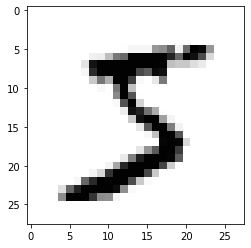

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [8]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [9]:
n = 0
for x in X_train[0]:
    sys.stdout.write("%.1f " % x)
    n += 1
    if n == 28:
      sys.stdout.write('\n')
      n = 0


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0 

In [10]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [11]:
print("class : %d" % (y_train[0]))

class : 5


In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
modelpath = 'MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [16]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])
print('\n TestAccuracy: %.4f'%(model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.19131, saving model to MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.19131 to 0.13845, saving model to MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13845 to 0.11239, saving model to MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11239 to 0.10235, saving model to MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10235 to 0.09345, saving model to MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09345 to 0.09129, saving model to MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09129 to 0.08348, saving model to MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08348

Epoch 9: val_loss improved from 0.08348 to 0.08295, saving model to MNIST_MLP.hdf5

Epoch 10: val_loss improved from 0.08295 to 0.08098, saving model to MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08098

Epoch 12: val_loss improved from 0.08098 to 0.08074, saving model to MNIST_MLP.hdf5

Epoch 13: val_loss improved from 0.08074 to 0.08033, saving mode

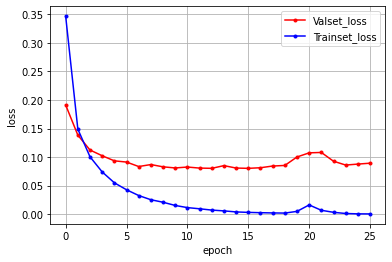

In [17]:
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Valset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()